<a href="https://colab.research.google.com/github/Parkhat-archive/Data-Science-Portfolio/blob/master/NEURAL_NETWORK_MNIST_CLOTHES_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist
print(data)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


In [3]:
(train_images, train_labels), (test_images, test_labels)= data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#shrinking data to decimals
train_images= train_images/255.0
test_images= test_images/255.0

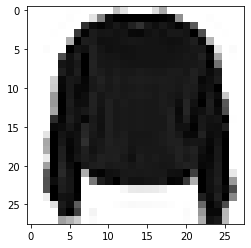

In [5]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [6]:
#flatten the data

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = "relu"), #rectified linear unit
    keras.layers.Dense(10, activation="softmax") #picks values to add up to one
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5009 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Tested acc', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8709
Tested acc 0.8708999752998352


In [9]:
prediction = model.predict(test_images)
#for one item
#prediction = model.predict(test_images[1])
print('Prediction:' , class_names[np.argmax(prediction[1])])

Prediction: Pullover


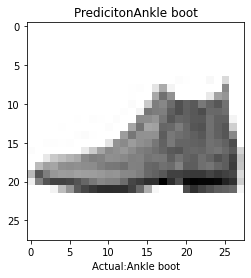

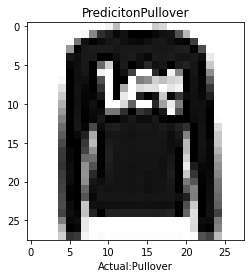

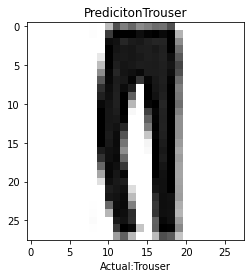

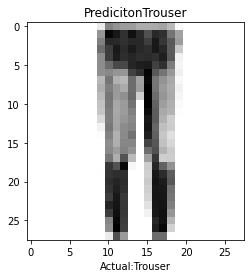

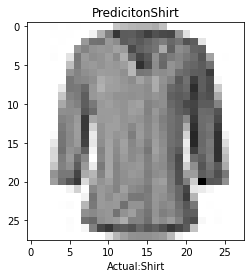

In [10]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel('Actual:'+ class_names[test_labels[i]])
  plt.title('Prediciton' + class_names[np.argmax(prediction[i])])
  plt.show()